In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
dataset = load_digits()
x = dataset.data
y = dataset.target 

for classname, classcount in zip(np.unique(y), np.bincount(y)):
    print(classname,classcount)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [3]:
dir(dataset)

['DESCR', 'data', 'images', 'target', 'target_names']

In [4]:
dataset.target


array([0, 1, 2, ..., 8, 9, 8])

In [5]:
imbalanced = y.copy()
imbalanced[imbalanced!=1]=0
for classname, classcount in zip(np.unique(imbalanced), np.bincount(imbalanced)):
    print(classname,classcount)
np.bincount(imbalanced)

0 1615
1 182


array([1615,  182], dtype=int64)

In [6]:
from sklearn.svm import SVC
xtrain,xtest,ytrain,ytest =train_test_split(x,imbalanced,random_state=0)

svm = SVC().fit(xtrain,ytrain)
svmpred = svm.predict(xtest)

svm.score(xtest,ytest)

0.9955555555555555

# Dummy Classifier

In [7]:
from sklearn.dummy import DummyClassifier
dum = DummyClassifier(strategy = 'most_frequent').fit(xtrain,ytrain)
dumpred = dum.predict(xtest)
dum.score(xtest,ytest)


0.9044444444444445

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

logreg = LogisticRegression().fit(xtrain,ytrain)
logpred=logreg.predict(xtest)

tree = DecisionTreeClassifier(max_depth=2).fit(xtrain,ytrain)
treepred=tree.predict(xtest)

svmlin = SVC(kernel='linear', C=1).fit(xtrain,ytrain)
svmlinpred =svmlin.predict(xtest)


C:\Users\Dinu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# confusion matrix

In [9]:
from sklearn.metrics import confusion_matrix
print('Most frequent class(Dummy Classifier): \n',confusion_matrix(ytest,dumpred))
print('SVM RBF Classifier : \n',confusion_matrix(ytest,svmpred))
print('SVM Linear Classifier: \n',confusion_matrix(ytest,svmlinpred))
print('Logistic Classifier: \n',confusion_matrix(ytest,logpred))
print('Decision Tree Classifier: \n',confusion_matrix(ytest,treepred))

Most frequent class(Dummy Classifier): 
 [[407   0]
 [ 43   0]]
SVM RBF Classifier : 
 [[407   0]
 [  2  41]]
SVM Linear Classifier: 
 [[402   5]
 [  5  38]]
Logistic Classifier: 
 [[401   6]
 [  8  35]]
Decision Tree Classifier: 
 [[400   7]
 [ 17  26]]


# classification report

In [10]:
from sklearn.metrics import classification_report

print('decision tree classifier, \n',classification_report(ytest,treepred, target_names=['not 1', '1']))

print('svm classifier, \n',classification_report(ytest,svmpred, target_names=['not 1', '1']))

print('logistic classifier, \n',classification_report(ytest,logpred, target_names=['not 1', '1']))

print('dummy  classifier, \n',classification_report(ytest,dumpred, target_names=['not 1', '1']))

decision tree classifier, 
               precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450

svm classifier, 
               precision    recall  f1-score   support

       not 1       1.00      1.00      1.00       407
           1       1.00      0.95      0.98        43

    accuracy                           1.00       450
   macro avg       1.00      0.98      0.99       450
weighted avg       1.00      1.00      1.00       450

logistic classifier, 
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weigh

C:\Users\Dinu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
df =pd.DataFrame({'svm':svmpred, 'true':ytest})

In [12]:
df[df.svm !=df.true]

#shows zero is taken as the negative class and 1 as positive
# as two values in output match withn the 2 false negatives in confusion matrix

,svm,true
213,0,1
331,0,1


In [13]:
confusion_matrix(ytest,svmpred)

array([[407,   0],
       [  2,  41]], dtype=int64)

In [14]:
df.query('svm==0 and svm ==true')
# 407 zero values in svm match with 407 true negatives in confusion matrix

,svm,true
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
443,0,0
445,0,0
446,0,0
447,0,0


# Decision function and probability #

The decision_function() returns the scores for the predicted class assigned by logistic classifier. Score above one are assigned the positive class and scores less than one assigned the negative class

Likewise the predict_proba() function shows the probability of the predicted class being the positive class, i.e., one. Hence you'll see the positive classes having high probability score as compared to the negative class(in our example zero is the negative class)

In [15]:
logscore = logreg.decision_function(xtest)
pred_score =logreg.predict_proba(xtest)

In [16]:
for yval,score in zip(ytest[0:10],logscore):   
    print(yval,score) 

0 -29.82877759984112
0 -19.382843049353983
0 -29.198539363817332
0 -21.74631699633657
0 -22.64237072194902
0 -11.80590757164758
1 6.4960049944402884
0 -23.35463325254307
0 -27.543925212270533
0 -26.8882099397981


In [17]:
for yval,pscore in zip(ytest[0:20],pred_score[:,1]):# columns 1 and 2 hold the probability of the class being zero and one!
    print(yval,pscore)                              

0 1.1105202609564001e-13
0 3.820658476351792e-09
0 2.0856214014272535e-13
0 3.594963841928448e-10
0 1.4673825094988193e-10
0 7.460299239835195e-06
1 0.9984928175733472
0 7.197996837650182e-11
0 1.0910013057161166e-12
0 2.1018358479318028e-12
0 1.4522930606726068e-14
0 1.7156360559747822e-10
0 1.0104533072178117e-11
0 1.5388007689230347e-06
0 1.2838403018962293e-06
0 1.660588190343669e-06
1 0.999994872996077
0 1.1928718174555696e-15
0 1.793113035100216e-06
0 1.4043989580287815e-13


Text(33.0, 0.5, 'True label')

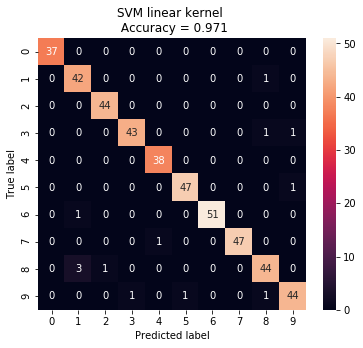

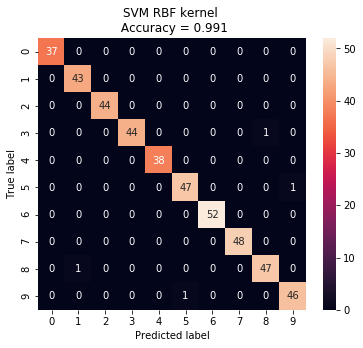

In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

x= dataset.data
y=dataset.target
xmtrain,xmtest,ymtrain,ymtest =train_test_split(x,y,random_state=0)

svm_m = SVC(kernel='linear').fit(xmtrain,ymtrain)
svm_mpred = svm_m.predict(xmtest)
cfm = confusion_matrix(ymtest,svm_mpred)
df = pd.DataFrame(cfm)
plt.figure(figsize=(6,5))
sns.heatmap(df, annot=True)
plt.title('SVM linear kernel \n Accuracy = {:.3f}'.format(accuracy_score(ymtest,svm_mpred)))
plt.xlabel('Predicted label')
plt.ylabel('True label')

svm_m = SVC(kernel='rbf').fit(xmtrain,ymtrain)
svm_mpred = svm_m.predict(xmtest)
cfm = confusion_matrix(ymtest,svm_mpred)
df = pd.DataFrame(cfm)
plt.figure(figsize=(6,5))
sns.heatmap(df, annot=True)
plt.title('SVM RBF kernel \n Accuracy = {:.3f}'.format(accuracy_score(ymtest,svm_mpred)))
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [19]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [20]:
x = diabetes.data[:,None,6]
y = diabetes.target
dia =pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dia['target'] =y
dia.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
xtrain,xtest,ytrain,ytest = train_test_split(x,y, random_state=0)
lr = LogisticRegression().fit(xtrain,ytrain)
lrpred = lr.predict(xtest)
#linreg = LinearRegression().fit(xtrain,ytrain)
#linpred = linreg.predict(xtest)

dumreg = DummyRegressor(strategy='mean').fit(xtrain,ytrain)
dumpred =dumreg.predict(xtest)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
xpoly = poly.fit_transform(x)
xptrain,xptest,yptrain,yptest =train_test_split(xpoly,y,random_state=0)
polymodel = LinearRegression().fit(xptrain,yptrain)
polypred =polymodel.predict(xptest)

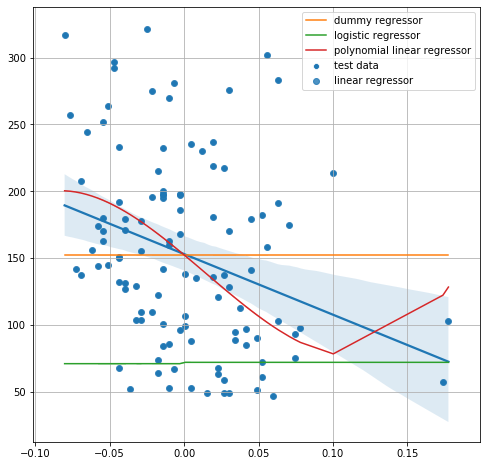

In [23]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(xtest.flatten(),ytest, label='test data')
sns.regplot(xtest,ytest,ax=ax, label='linear regressor')
sns.lineplot(xtest.flatten(),dumpred, ax=ax, label='dummy regressor')
sns.lineplot(xtest.flatten(),lrpred, ax=ax, label='logistic regressor')
sns.lineplot(xtest.flatten(),polypred, ax=ax, label='polynomial linear regressor')
plt.grid()

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
dataset = datasets.load_digits()
x = dataset.data
y = dataset.target==1
clf = SVC(kernel='rbf', C=1)

print('Cross validation score (accuracy)\n',cross_val_score(clf,x,y, cv=5))
print('Cross validaiton score (AUC)\n', cross_val_score(clf,x,y,cv=5, scoring='roc_auc'))
print('Cross validaiton score (recall)\n', cross_val_score(clf,x,y,cv=5, scoring='recall'))

Cross validation score (accuracy)
 [0.96944444 0.99444444 0.99164345 0.98885794 0.99442897]
Cross validaiton score (AUC)
 [0.9936407  0.99974897 0.999828   0.99819401 0.999914  ]
Cross validaiton score (recall)
 [0.81081081 0.97297297 0.97222222 0.88888889 0.97222222]


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
dataset = datasets.load_digits()
x = dataset.data
y = dataset.target==1

xtrain,xtest,ytrain,ytest =train_test_split(x,y,random_state=0)

clf =SVC(kernel='rbf')
grid_vals ={'gamma': [0.001,0.01,0.05,0.1,1,10,100]}
grid_clf = GridSearchCV(clf, param_grid = grid_vals)

grid_clf.fit(xtrain,ytrain)
decision_scores = grid_clf.decision_function(xtest)

print('best grid parameters (max accuracy) :',grid_clf.best_params_)
print('best grid score (acuuracy) : ',grid_clf.best_score_)


grid_clf_auc =GridSearchCV(clf,param_grid=grid_vals, scoring ='roc_auc')
grid_clf_auc.fit(xtrain,ytrain)

grid_auc_decision_scores = grid_clf_auc.decision_function(xtest)

print('Test set AUC score:', roc_auc_score(ytest,grid_auc_decision_scores))
print('best grid parameter (max AUC ):', grid_clf_auc.best_params_)
print('best grid score (AUC) : ', grid_clf_auc.best_score_)

best grid parameters (max accuracy) : {'gamma': 0.001}
best grid score (acuuracy) :  0.9985157648354676
Test set AUC score: 0.99982858122393
best grid parameter (max AUC ): {'gamma': 0.001}
best grid score (AUC) :  1.0


In [26]:
from sklearn.metrics import SCORERS

In [27]:
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted']

<Figure size 1080x864 with 0 Axes>

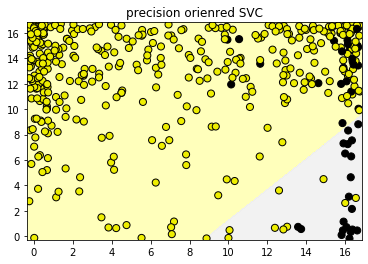

Grid best parameter (max precision):{'class_weight': {1: 2}}
Grid best score (max precision):0.5288419913419913


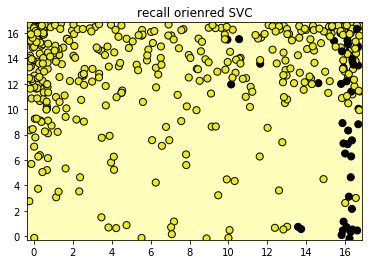

Grid best parameter (max recall):{'class_weight': {1: 50}}
Grid best score (max recall):0.9555555555555555


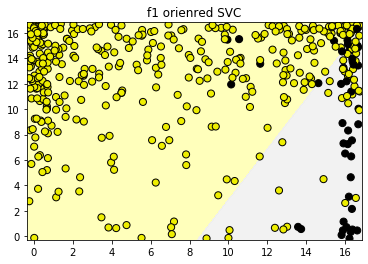

Grid best parameter (max f1):{'class_weight': {1: 4}}
Grid best score (max f1):0.5192706403816417


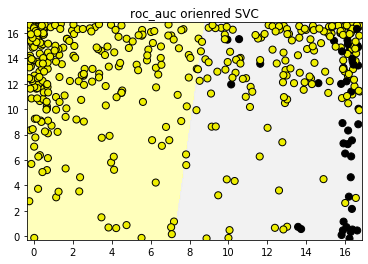

Grid best parameter (max roc_auc):{'class_weight': {1: 20}}
Grid best score (max roc_auc):0.8694324194324194


<Figure size 432x288 with 0 Axes>

In [28]:
from adspy_shared_utilities import plot_class_regions_for_classifier
dataset = datasets.load_digits()
x = dataset.data
y = dataset.target==1

xtrain,xtest,ytrain,ytest = train_test_split(x,y)

x_train = xtrain[:,[20,59]]+np.random.rand(xtrain.shape[0],2) -0.25
x_test  = xtest[:,[20,59]]+np.random.rand(xtest.shape[0],2) -0.25


clf = SVC(kernel='linear')
gvals ={'class_weight':['balanced',{1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}

plt.figure(figsize=(15,12))

for i, criteria in enumerate(('precision','recall','f1','roc_auc')):
    custom_grid_clf =GridSearchCV(clf, param_grid=gvals, scoring= criteria).fit(x_train,ytrain)
    plot_class_regions_for_classifier(custom_grid_clf,x_test,ytest, title=criteria+' orienred SVC')
    print('Grid best parameter (max {0}):{1}'.format(criteria,custom_grid_clf.best_params_))
    print('Grid best score (max {0}):{1}'.format(criteria,custom_grid_clf.best_score_))
    
   
    
plt.tight_layout()


<Figure size 648x432 with 0 Axes>

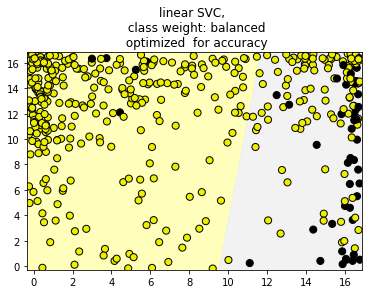

C:\Users\Dinu\anaconda3\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


At zero threshold precision : 0.29, recall : 0.90


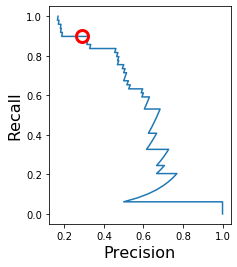

In [29]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

dataset = datasets.load_digits()
x = dataset.data
y = dataset.target==1

xtrain,xtest,ytrain,ytest = train_test_split(x,y)

x_train = xtrain[:,[20,59]]+np.random.rand(xtrain.shape[0],2) -0.25
x_test  = xtest[:,[20,59]]+np.random.rand(xtest.shape[0],2) -0.25


clf = SVC(kernel='linear', class_weight='balanced').fit(x_train,ytrain)

yscores =clf.decision_function(x_test)

plt.figure(figsize=(9,6))
plot_class_regions_for_classifier(clf,x_test,ytest, title='linear SVC, \n class weight: balanced\n optimized  for accuracy')

precision,recall,thresholds = precision_recall_curve(ytest,yscores) 
closestzero =np.argmin(np.abs(thresholds))
close_p =precision[closestzero]
close_r =recall[closestzero]

plt.plot(precision,recall, label='precision-recall curve')
plt.xlabel('Precision', fontsize =16)
plt.ylabel('Recall', fontsize =16)

plt.plot(close_p,close_r,'o',markersize =12, fillstyle ='none', c='r', mew=3)

plt.axes().set_aspect('equal')

print('At zero threshold precision : {:.2f}, recall : {:.2f}'.format(close_p,close_r))

precision score : 0.878
recall score : 0.837


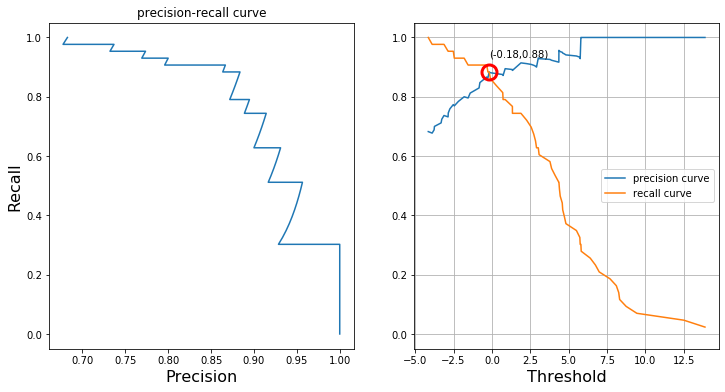

In [41]:
dataset=datasets.load_digits()
x=dataset.data
y=dataset.target

imbalanced = y.copy()
imbalanced[imbalanced!=1]=0

xtrain,xtest,ytrain,ytest =train_test_split(x,imbalanced, random_state=0)
clf = SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True).fit(xtrain,ytrain)
decision_score= clf.decision_function(xtest)
p_score =clf.predict_proba(xtest)
y_pred =clf.predict(xtest)

precision,recall,threshold = precision_recall_curve(ytest,decision_score)
plt.figure(figsize=(12,6))
ax=plt.subplot(121)
plt.plot(precision,recall)
plt.xlabel('Precision', fontsize =16)
plt.ylabel('Recall', fontsize =16)
plt.title('precision-recall curve')

plt.subplot(122,sharey=ax)
plt.plot(threshold,precision[:-1], label='precision curve')
plt.plot(threshold,recall[:-1], label='recall curve')
for p,r,t in zip(precision,recall,threshold):
    if p==r:
        plt.plot(t,p, marker='o', fillstyle='none',markersize=15, c='r',mew=3)
        plt.text(t,r+0.05,str('({:.2f},{:.2f})'.format(t,p)))
plt.legend(loc=7)
plt.xlabel('Threshold', fontsize =16)
plt.grid()

print('precision score : {:.3f}'.format(precision_score(ytest,y_pred)))

print('recall score : {:.3f}'.format(recall_score(ytest,y_pred)))



<Figure size 648x432 with 0 Axes>

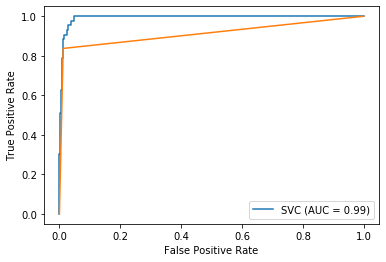

In [49]:
import sklearn.metrics
plt.figure(figsize=(9,6))

sklearn.metrics.plot_roc_curve(clf,xtest,ytest)


fpr, tpr, thresholds = sklearn.metrics.roc_curve(ytest, y_pred)
plt.plot(fpr,tpr)


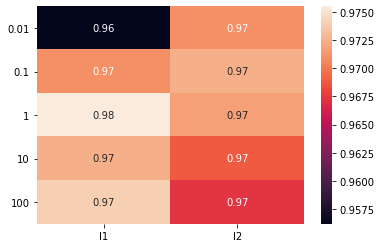

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

xscaled = StandardScaler().fit_transform(x)

xtrain,xtest,ytrain,ytest = train_test_split(x,imbalanced, random_state=0)

gridvals =({'penalty':['l1', 'l2'],'C':[0.01, 0.1, 1, 10, 100]})

lr =LogisticRegression(solver='liblinear')
clf =GridSearchCV(lr,gridvals)
clf.fit(xtrain,ytrain)

sns.heatmap(clf.cv_results_['mean_test_score'].reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100],annot=True)
plt.yticks(rotation=0);

In [118]:
clf.cv_results_

{'mean_fit_time': array([0.0073884 , 0.01657853, 0.02865543, 0.0259913 , 0.14519739,
        0.03582006, 0.27862353, 0.04913902, 0.27674847, 0.06613302]),
 'std_fit_time': array([0.003836  , 0.005152  , 0.00708814, 0.00767273, 0.03996749,
        0.00626942, 0.06014542, 0.00740441, 0.06560138, 0.0181401 ]),
 'mean_score_time': array([0.00066895, 0.0031497 , 0.        , 0.        , 0.00063286,
        0.00056381, 0.        , 0.0033556 , 0.00090718, 0.00059924]),
 'std_score_time': array([0.00056125, 0.0062994 , 0.        , 0.        , 0.00077918,
        0.00112762, 0.        , 0.0062242 , 0.00181437, 0.00048928]),
 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1',
                    'l2'],
              mask=

In [114]:
clf.cv_results_['mean_test_score'].reshape(5,2)

array([[0.95619441, 0.97103401],
       [0.97103676, 0.97252926],
       [0.97550324, 0.97178576],
       [0.97327551, 0.96882005],
       [0.97327826, 0.96733306]])

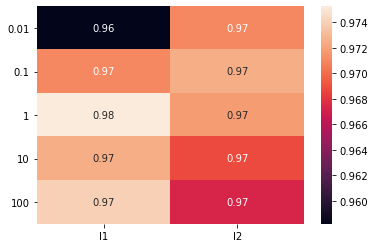

In [126]:
sns.heatmap(clf.cv_results_['mean_test_score'].reshape(5,2),robust =True, xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100],annot=True)
plt.yticks(rotation=0);

In [131]:
xtrain[:,[0,1]]

array([[0., 3.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class